In [5]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_json('../../data/wish_products/Wish_Meta_Train.json', lines=True)
df_test = pd.read_json('../../data/wish_products/Wish_Meta_Test.json', lines=True)

(array([ 316682.,       0.,       0., 6661010.,       0.,       0.,
        9366678.,       0.,       0.,  258678.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

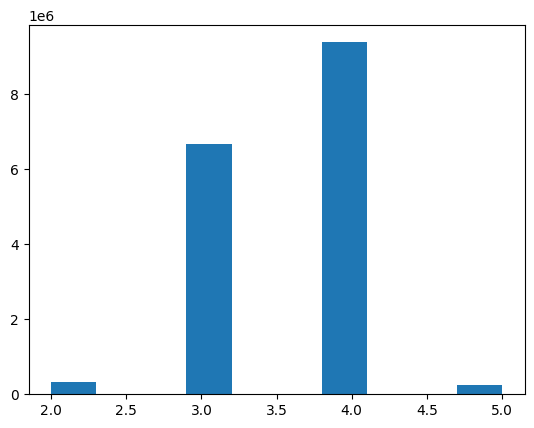

In [6]:
plt.hist(df_train.category.apply(len))

In [7]:
tmp = df_train.category.tolist()
tmp = [j for i in tmp for j in i]
tmp = Counter(tmp)
tmp.most_common(10)

[('Home & Garden', 3222671),
 ('Automobiles & Motorcycles', 2025646),
 ('Home Improvement', 1565375),
 ('Sports', 1559988),
 ('Beauty & Health', 1064751),
 ('Auto Replacement Parts', 922624),
 ('Consumer Electronics', 910680),
 ('Kitchen,Dining & Bar', 838285),
 ('Mother & Kids', 761165),
 ('Tools', 755160)]

In [8]:
{
    '# products': len(df_train),
    '# category paths': len(set(df_train.category.apply(tuple))),
    '# category nodes': len(set([j for i in df_train.to_dict('records') for j in i['category']])),
    'avg path length': df_train.category.apply(len).mean()
}

{'# products': 16603048,
 '# category paths': 5278,
 '# category nodes': 5681,
 'avg path length': 3.5762406999004037}

In [9]:
{
    '# l1 nodes': len(set(df_train.category.apply(lambda x: x[0] if len(x) > 0 else ''))),
    '# l2 nodes': len(set(df_train.category.apply(lambda x: x[1] if len(x) > 1 else ''))),
    '# l3 nodes': len(set(df_train.category.apply(lambda x: x[2] if len(x) > 2 else ''))),
    '# l4 nodes': len(set(df_train.category.apply(lambda x: x[3] if len(x) > 3 else ''))),
}

{'# l1 nodes': 26, '# l2 nodes': 324, '# l3 nodes': 2268, '# l4 nodes': 3040}

In [10]:
df_train_paths = set(df_train.category.apply(tuple))
df_test_paths = set(df_test.category.apply(tuple))

In [11]:
len(df_test_paths.intersection(df_train_paths)) / len(df_test_paths)

1.0

In [12]:
len(df_test_paths.intersection(df_train_paths)) / len(df_train_paths)

0.9312239484653277

In [13]:
df_train.sample(10).to_dict('records')

[{'title': '5 unidades/lote H20R1203 TO-247 IGBT 1200V, nuevo original',
  'category': ['Cellphones & Telecommunications',
   'Mobile Phone Accessories',
   'Power Bank Accessories'],
  'text': '5 unidades/lote H20R1203 TO-247 IGBT 1200V, nuevo original -> [cellphones & telecommunications][mobile phone accessories][power bank accessories]'},
 {'title': '10pcs 1/2/3ml Empty Clear Glass Perfume Small Sample Vials Perfume Bottle Laboratory Liquid Fragrance Test Tube Trial Bottle',
  'category': ['Beauty & Health', 'Skin Care Tools', 'Refillable Bottles'],
  'text': '10pcs 1/2/3ml Empty Clear Glass Perfume Small Sample Vials Perfume Bottle Laboratory Liquid Fragrance Test Tube Trial Bottle -> [beauty & health][skin care tools][refillable bottles]'},
 {'title': 'Test OK!Original OEM Mainboard Motherboard MCU PCB Für Nikon D750; hauptplatine, Mutter bord Für Kamera Reparatur Teile',
  'category': ['Consumer Electronics',
   'Camera & Photo',
   'Camera Replacement Parts',
   'Circuits'],
  '